## Chapter 8 - Tree-based Methods - All graphs

The following notebook is a re-creation from
[JWarmenhoven's notebook](https://nbviewer.jupyter.org/github/JWarmenhoven/ISLR-python/tree/master/Notebooks/)
for the purpose of learning.

#### Import Block:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
import pydotplus
from IPython.display import Image
from six import StringIO

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,\
    export_graphviz
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, \
    RandomForestRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

In [6]:
# This function return the tree image 
def print_tree(estimator, features, class_names=None, filled=True):    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features,
                    class_names=class_names, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

#### 8.1.1 Regression Trees

Import hitter dataset

In [7]:
data_path = 'D:\\PycharmProjects\\ISLR\\data\\'
df = pd.read_csv(f'{data_path}Hitters.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
Unnamed: 0    263 non-null object
AtBat         263 non-null int64
Hits          263 non-null int64
HmRun         263 non-null int64
Runs          263 non-null int64
RBI           263 non-null int64
Walks         263 non-null int64
Years         263 non-null int64
CAtBat        263 non-null int64
CHits         263 non-null int64
CHmRun        263 non-null int64
CRuns         263 non-null int64
CRBI          263 non-null int64
CWalks        263 non-null int64
League        263 non-null object
Division      263 non-null object
PutOuts       263 non-null int64
Assists       263 non-null int64
Errors        263 non-null int64
Salary        263 non-null float64
NewLeague     263 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 45.2+ KB


Text(0.5, 0, 'Log(Salary)')

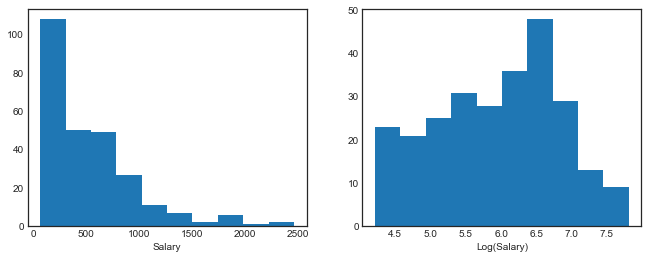

In [8]:
# Set up X and y
X = df[['Years', 'Hits']].values
y = np.log(df.Salary.values)

# Plot histogram
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(11,4))

# Left Plot
ax1.hist(df.Salary.values)
ax1.set_xlabel('Salary')

# Right Plot
ax2.hist(y)
ax2.set_xlabel('Log(Salary)')

Regression tree

In [9]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=3, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

#### Figure 8.1

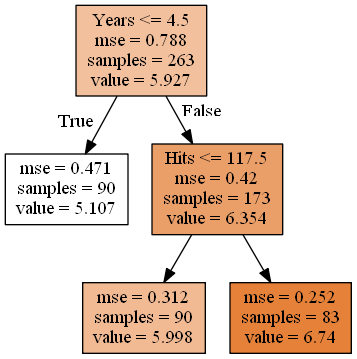

In [10]:
import graphviz
graph = print_tree(regr, features=['Years', 'Hits'])
Image(graph.create_png())

#### Figure 8.2

Text(11, 170, 'R3')

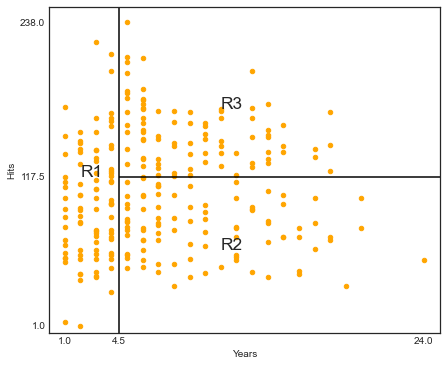

In [11]:
df.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large')

#### 8.1.2 Classification Tree

In [20]:
df2 = pd.read_csv(f'{data_path}//Heart.csv').drop('Unnamed: 0', axis=1).dropna()
df2.head()

# Transform categorical variables
df2.ChestPain = pd.factorize(df2.ChestPain)[0]
df2.Thal = pd.factorize(df2.Thal)[0]

# Get the X and y 
X2 = df2.drop('AHD', axis=1)
y2 = pd.factorize(df2.AHD)[0]

# Classification decision tree
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X2, y2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=3, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
clf.score(X2, y2)

0.8114478114478114

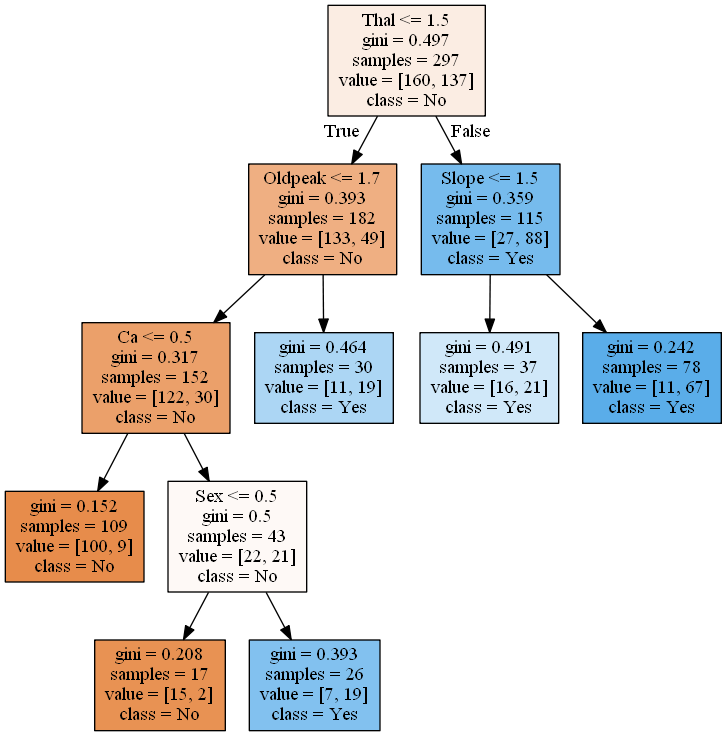

In [23]:
graph2 = print_tree(clf, features=X2.columns, class_names=['No', 'Yes'])
Image(graph2.create_png())